In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [2]:
df=pd.read_csv('APY.csv')

In [3]:
df.dropna(inplace=True)
df.columns

Index(['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ',
       'Production', 'Yield'],
      dtype='object')

In [4]:
df.drop(['State','Crop_Year'],inplace=True,axis=1)
# df.columns.to_list()

In [5]:
df=pd.get_dummies(df)


In [6]:
df['production_per_area']=df['Production']/df['Area ']

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingRegressor


In [8]:
xtr,xts,ytr,yts=train_test_split(df.drop(['Yield'],axis=1),df['Yield'],random_state=42)

In [9]:
m=Ridge(alpha=0.5)
# type(m)
# m1=HistGradientBoostingRegressor()

m

In [10]:
# m.fit(xtr,ytr)
m.fit(xtr,ytr)

C:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.3056e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.5)

In [11]:
ypred=m.predict(xts)
ypred

array([ 2.35181503, 19.90466469,  0.87506373, ...,  3.09961037,
        2.74924652,  1.40530533])

In [12]:
from sklearn.metrics import r2_score

In [14]:
r2_score(yts,ypred)

0.9999999767170847

In [15]:
import matplotlib.pyplot as plt

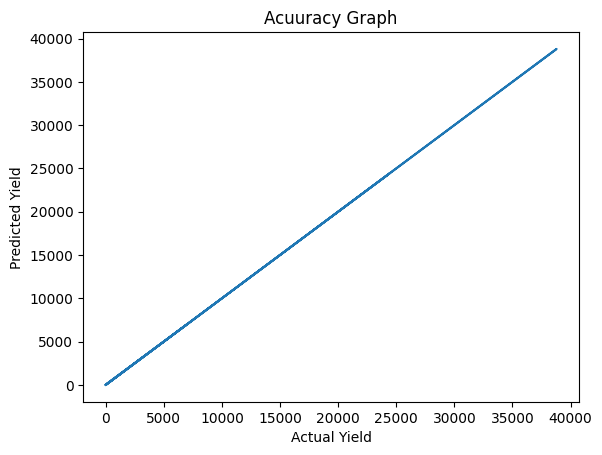

In [24]:
plt.plot(yts,ypred)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Acuuracy Graph')
plt.show(g)

In [ ]:
labels = ['xts', 'xtr', 'yts', 'ytr']
accuracy = [0.85, 0.92, 0.78, 0.91]

# Create a bar chart
plt.bar(labels, accuracy)

# Add chart title and axis labels
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Show the chart
plt.show()